In [1]:
!pip install opencv-python

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [3]:
# Import the 2 images from your drive
img1= cv2.imread('messi.jpg')
type(img1)
img2 = cv2.imread('lion.webp')
type(img2)

numpy.ndarray

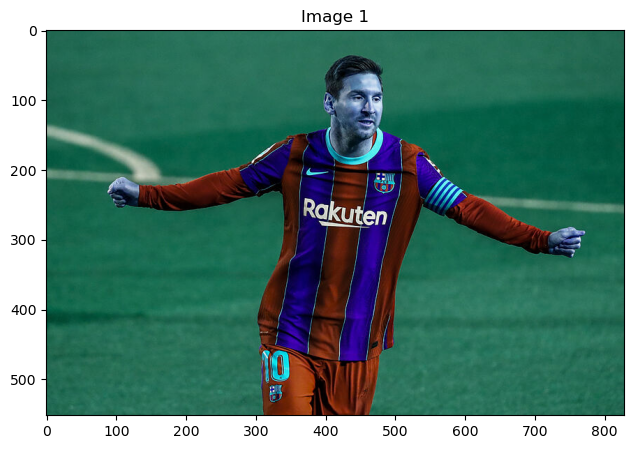

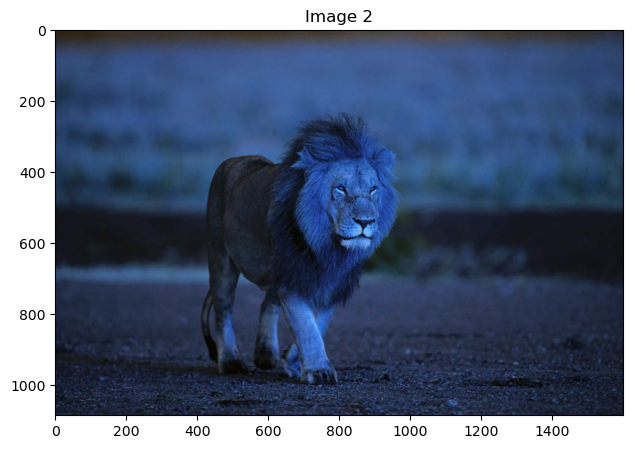

In [5]:
'''convert and display the images'''

# convert the images from bgr to rgb
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
# show the images for reference
plt.figure(figsize=(10,5))
plt.imshow(img1)
plt.title('Image 1')
plt.show()
plt.figure(figsize=(10,5))
plt.imshow(img2)
plt.title('Image 2')
plt.show()

(552, 828)


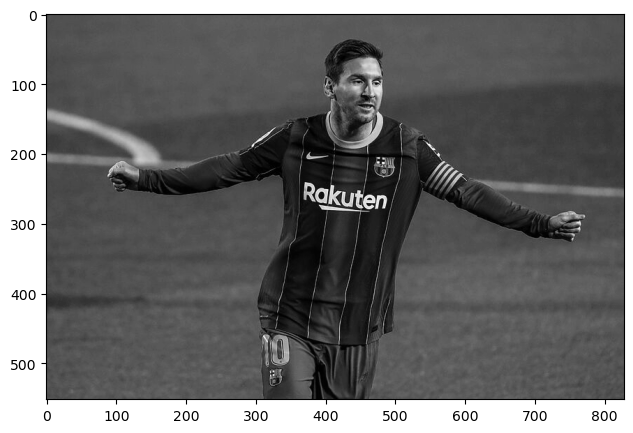

In [6]:
'''Obtain a grayscale version of the first image'''

img1_gray= cv2.cvtColor(img1,cv2.COLOR_RGB2GRAY)
print(img1_gray.shape)
plt.figure(figsize=(10,5))
plt.imshow(img1_gray,cmap='gray', vmin=0, vmax=255)
plt.show()

Height and width of original image 552 828
Original Image


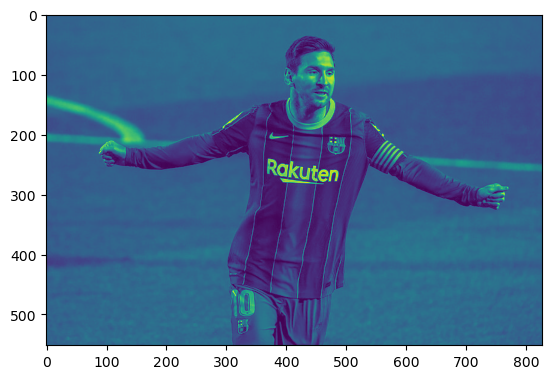

Rotated Image


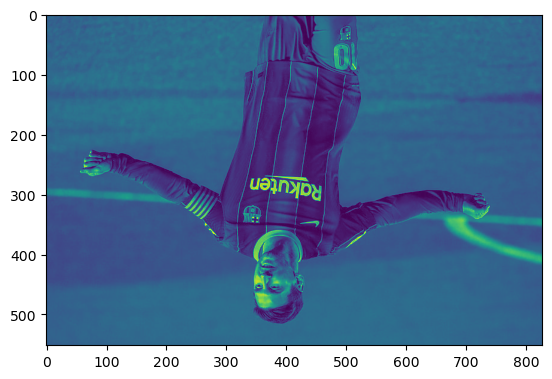

In [7]:
#Rotated version of the grayscale image
# First we need to obtain the center of original image by dividing height and width by 2

height, width = img1_gray.shape[:2]
print("Height and width of original image", height, width)
# get the coordinates of the center of the image to create the 2D rotation matrix
center = (width/2, height/2)
# using cv2.getRotationMatrix2D() to get the rotation matrix
rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=180, scale=1)
# rotate the image using cv2.warpAffine
rotated_image1 = cv2.warpAffine(src=img1_gray, M=rotate_matrix, dsize=(width,
height))
print("Original Image")
plt.imshow(img1_gray)
plt.show()
print("Rotated Image")
plt.imshow(rotated_image1)
plt.show()

(552, 828, 3)


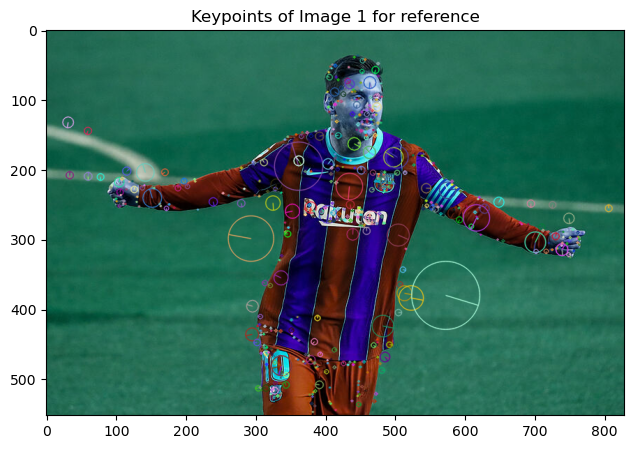

In [9]:
#Obtain and display the SIFT keypoints of the first image

sift = cv2.SIFT_create()
kp = sift.detect(img1,None)
keypoints=cv2.drawKeypoints(img1,kp,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
#cv2.imwrite('sift_keypoints.jpg',img1)
print(keypoints.shape)
plt.figure(figsize=(10,5))
plt.imshow(keypoints)
plt.title('Keypoints of Image 1 for reference')
plt.show()

In [10]:
# using SIFT detect the feature descriptors of the 2 images
sift = cv2.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img1_gray,None)
len(keypoints_1), len(keypoints_2)

(602, 602)

In [11]:
# create a bruteforce matcher
#feature matching

bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

#How many matches do we have?
len(matches)

401

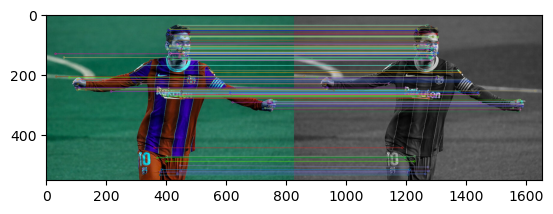

It's a Match!!!


In [12]:
#Draw 200 out of the matched keypoints and decide whether or not the images are a match.

img3 = cv2.drawMatches(img1, keypoints_1, img1_gray, keypoints_2, matches[:200],
img1_gray, flags=2)
plt.imshow(img3),plt.show()
# decide whether the images are a match or not based on the number of good matches.
if len(matches)> 0.6 * len(keypoints_1):
    print("It's a Match!!!")
else:
    print("The two images do not match")

In [13]:
#Use SIFT to detect the keypoints and descriptors of the image and its rotated grays version
# using SIFT detect the feature descriptors of the 2 images

sift = cv2.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_3, descriptors_3 = sift.detectAndCompute(rotated_image1,None)
len(keypoints_1), len(keypoints_3)

(602, 622)

In [14]:
# create a bruteforce matcher
#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches = bf.match(descriptors_1,descriptors_3)
matches = sorted(matches, key = lambda x:x.distance)

In [15]:
#How many matches do we have?
len(matches)

397

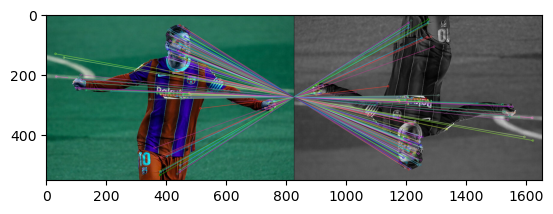

It's a Match!!!


In [18]:
#Draw 200 out of the matched keypoints and decide whether or not the images are a match.

img4 = cv2.drawMatches(img1, keypoints_1, rotated_image1, keypoints_3,
matches[:200], rotated_image1, flags=2)
plt.imshow(img4),plt.show()
# decide whether the images are a match or not based on the number of good matches.
if len(matches)> 0.6 * len(keypoints_1):
    print("It's a Match!!!")
else:
    print("The two images do not match")

In [21]:
#Use SIFT to detect the keypoints and descriptors of the first image (messi) and the second image (lion)
# using SIFT detect the feature descriptors of the 2 images

sift = cv2.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_4, descriptors_4 = sift.detectAndCompute(img2,None)
len(keypoints_1), len(keypoints_4)

(602, 2326)

In [20]:
#Create a brute force matcher to match the features from the two images
# create a bruteforce matcher
#feature matching

bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches = bf.match(descriptors_1,descriptors_4)
matches = sorted(matches, key = lambda x:x.distance)

In [22]:
#How many matches do we have?
len(matches)

223

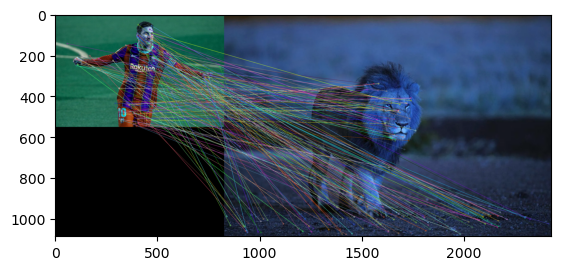

The two images do not match


In [24]:
#Draw 200 out of the matched keypoints and decide whether or not the images are a match.

img5 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_4, matches[:200], img2,
flags=2)
plt.imshow(img5),plt.show()
# decide whether the images are a match or not based on the number of good matches.
if len(matches)> 0.6 * len(keypoints_1):
    print("It's a Match!!!")
else:
    print("The two images do not match")